In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_height', 'Shucked_height', 'Viscera_height', 'Shell_weight', 'Rings']

data = pd.read_csv('abalone.data', names=col_names)

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data = pd.get_dummies(data)

In [5]:
data.head()

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
data.drop('Sex_M', axis=1, inplace=True)

In [7]:
data.head()

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1


<AxesSubplot:>

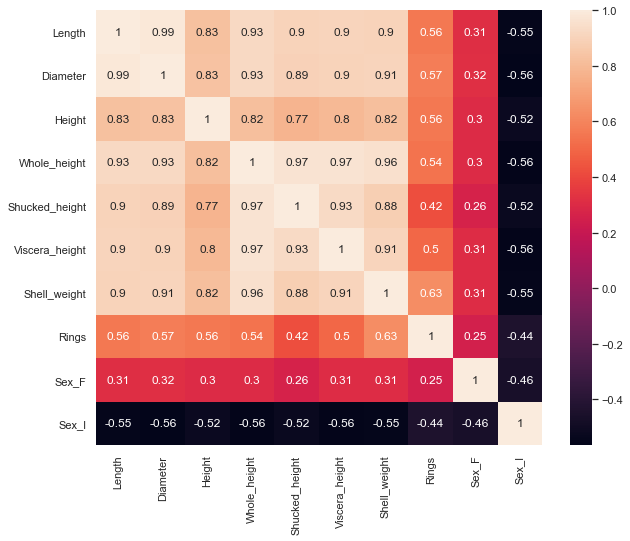

In [9]:
plt.figure(figsize=(10, 8))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True)

In [10]:
selected_feature = ['Length', 'Diameter', 'Height', 'Whole_height', 'Shucked_height', 'Shell_weight', 'Rings']

selected_data = data[selected_feature]

In [16]:
selected_data['ring'] = selected_data['Rings'].apply(lambda x: str(x))

C:\Users\Asus\AppData\Local\Temp/ipykernel_8452/2723899586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['ring'] = selected_data['Rings'].apply(lambda x: str(x))


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

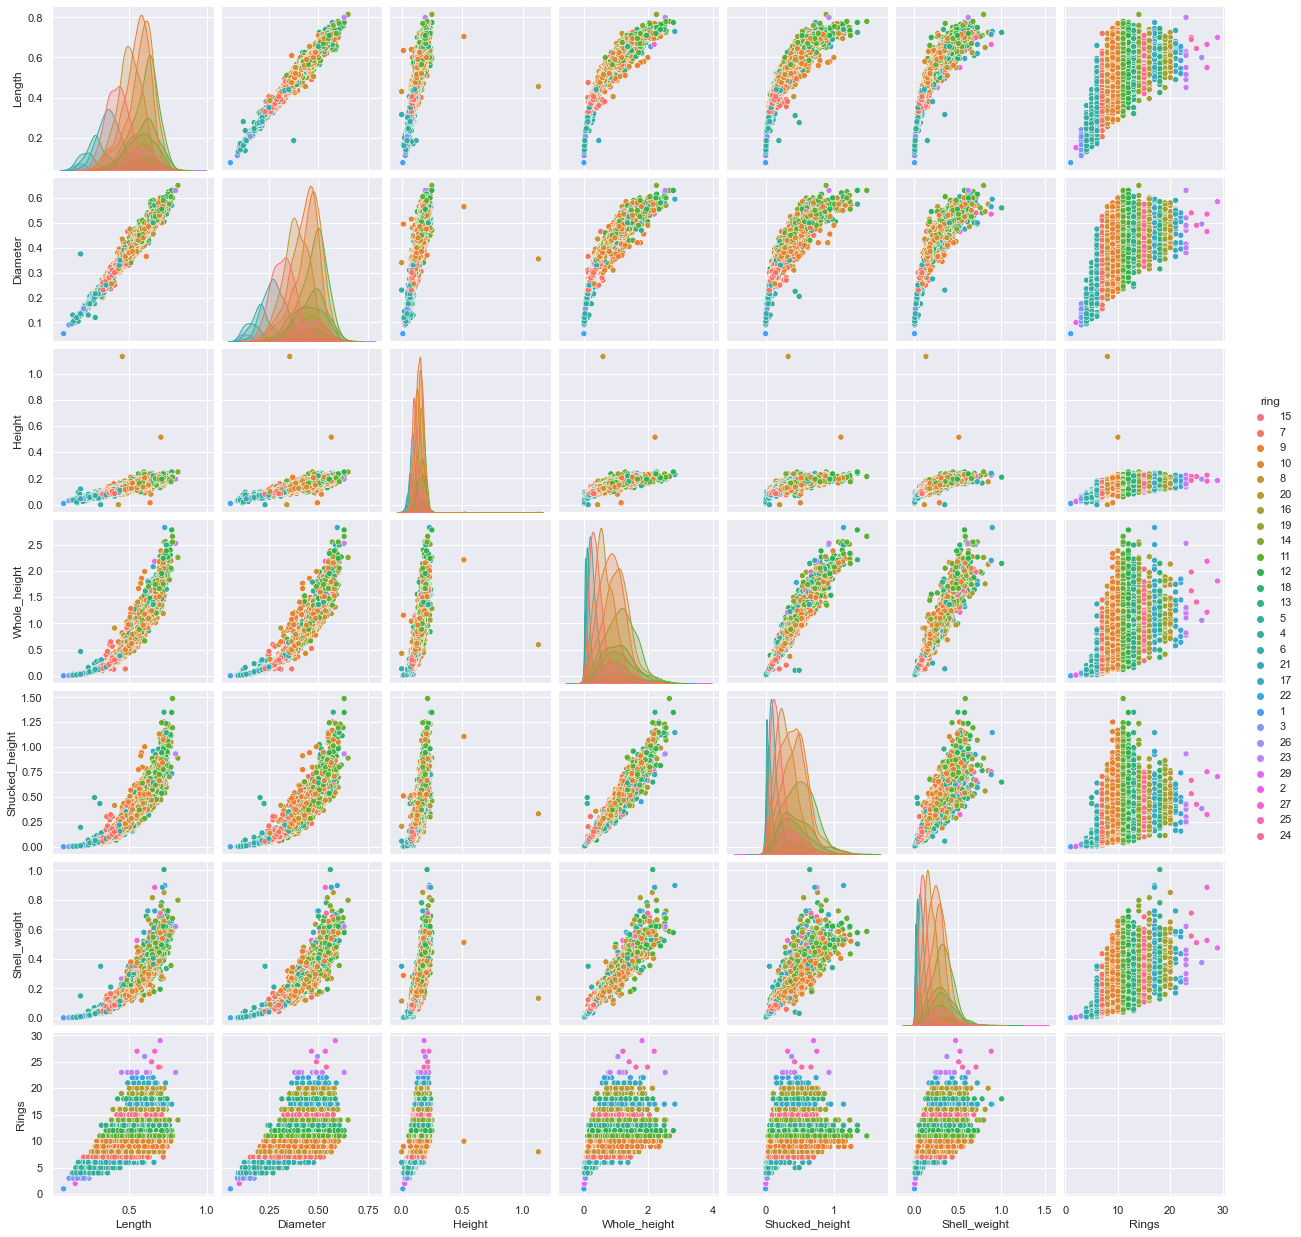

In [18]:
sns.pairplot(selected_data, hue='ring')

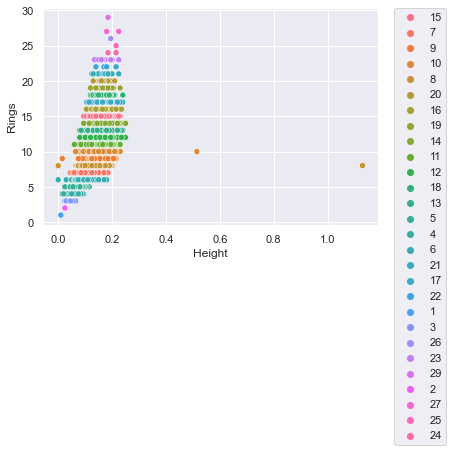

In [23]:
sns.scatterplot(data=selected_data, x='Height', y='Rings', hue='ring')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [19]:
data.head()

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1


In [35]:
data['rings_class'] = data.Rings.apply(lambda x: str(x))

### Split the data

In [113]:
x = data.drop(columns=['Rings', 'rings_class'])
y, levels = pd.factorize(data['rings_class'])

In [97]:
y

array([ 0,  1,  2, ...,  2,  3, 10], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split

In [115]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
def target_balance(train_data, test_data):
    for x in train_data['rings_class'].unique():
        train_perc = (train_data[train_data['rings_class'] == x].shape[0]) / (train_x.shape[0])
        test_perc = (test_data[test_data['rings_class'] == x].shape[0]) / (test_x.shape[0])
        print(f'Target "{x}" : train = {train_perc} , test = {test_perc}')

In [103]:
target_balance(train_x, test_x)

Target "11" : train = 0.11792876384316073 , test = 0.11124401913875598
Target "8" : train = 0.14037713259503143 , test = 0.11842105263157894
Target "7" : train = 0.09188865609099073 , test = 0.10047846889952153
Target "12" : train = 0.06465130200538761 , test = 0.061004784688995214
Target "18" : train = 0.008979347500748278 , test = 0.014354066985645933
Target "9" : train = 0.16372343609697695 , test = 0.16985645933014354
Target "6" : train = 0.06315474408859623 , test = 0.05741626794258373
Target "13" : train = 0.051481592337623464 , test = 0.03708133971291866
Target "14" : train = 0.029931158335827598 , test = 0.03110047846889952
Target "17" : train = 0.014965579167913799 , test = 0.009569377990430622
Target "10" : train = 0.1481592337623466 , test = 0.16626794258373206
Target "15" : train = 0.02454354983537863 , test = 0.025119617224880382
Target "5" : train = 0.024842861418736904 , test = 0.03827751196172249
Target "4" : train = 0.013169709667764143 , test = 0.01555023923444976
Tar

### Modelling

In [150]:
def make_heatmap(test_label, prediction):
    cf_matrix = pd.crosstab(levels[test_label],levels[prediction])
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('True Label')

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
random_cl = RandomForestClassifier(n_estimators=10000)

In [152]:
random_cl.fit(train_x, train_y)

RandomForestClassifier(n_estimators=10000)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
prediction = random_cl.predict(test_x)

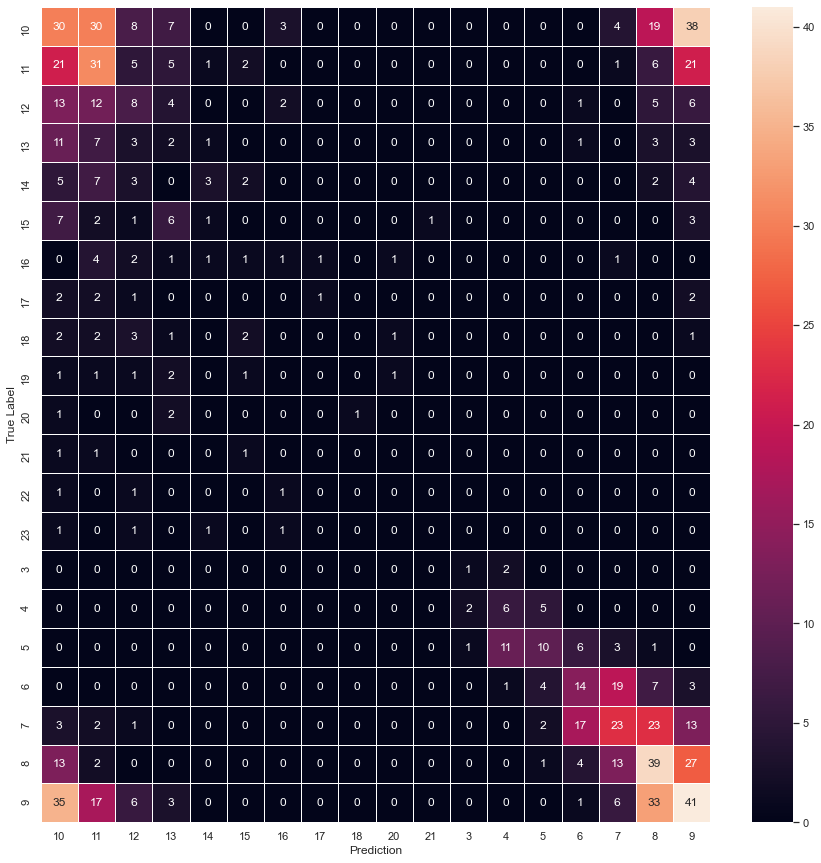

In [156]:
make_heatmap(test_y, prediction)

In [157]:
print(classification_report(levels[test_y],levels[prediction]))

              precision    recall  f1-score   support

          10       0.20      0.22      0.21       139
          11       0.26      0.33      0.29        93
          12       0.18      0.16      0.17        51
          13       0.06      0.06      0.06        31
          14       0.38      0.12      0.18        26
          15       0.00      0.00      0.00        21
          16       0.12      0.08      0.10        13
          17       0.50      0.12      0.20         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         4
           3       0.25      0.33      0.29         3
           4       0.30      0.46      0.36        13
           5       0.45      0.31      0.37        32
           6       0.32    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## export model

In [109]:
import joblib as jb

In [110]:
filename = 'first_rand_forest.sav'

In [111]:
#jb.dump(random_cl, filename)

['first_rand_forest.sav']

In [112]:
train_x

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Sex_F,Sex_I,rings_class
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,0,1,11
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,0,1,8
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,1,0,7
3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,0,1,7
3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,0,0,12
...,...,...,...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,1,0,9
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,1,0,12
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,0,0,11
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,0,0,9


### Old prediction

In [68]:
pred_matrix = confusion_matrix(test_y, prediction)

Text(111.5, 0.5, 'True label')

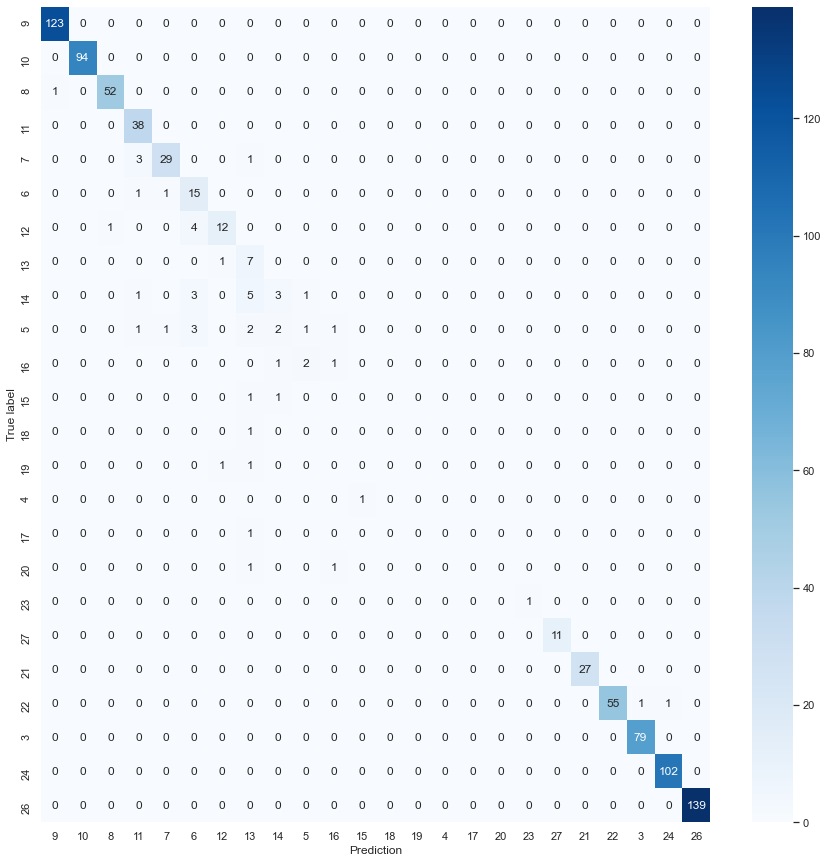

In [95]:
plt.figure(figsize=(15, 15))
sns.heatmap(pred_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_y, yticklabels=label_y)
# plt.xticks(label.to_list())
plt.xlabel('Prediction')
plt.ylabel('True label')

In [72]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

          10       0.99      1.00      1.00       123
          11       1.00      1.00      1.00        94
          12       0.98      0.98      0.98        53
          13       0.86      1.00      0.93        38
          14       0.94      0.88      0.91        33
          15       0.60      0.88      0.71        17
          16       0.86      0.71      0.77        17
          17       0.35      0.88      0.50         8
          18       0.43      0.23      0.30        13
          19       0.25      0.09      0.13        11
          20       0.33      0.25      0.29         4
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
           3       1.00    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gagalllll

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtc = DecisionTreeClassifier()

In [136]:
dtc.fit(train_x, train_y)

DecisionTreeClassifier()

In [137]:
dtc_prediction = dtc.predict(test_x)

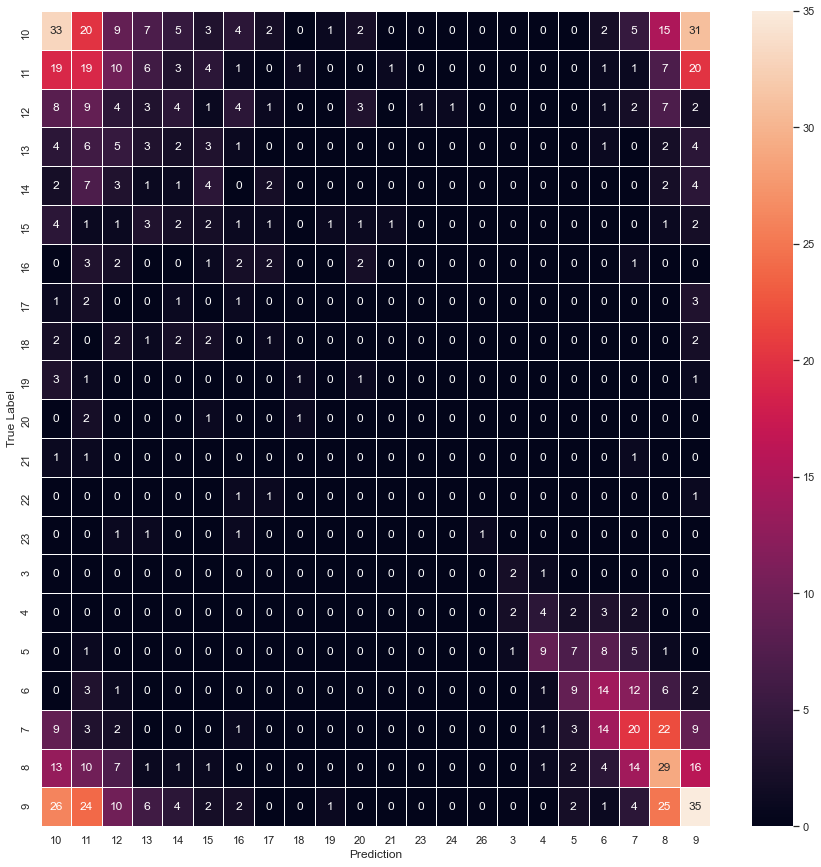

In [149]:
make_heatmap(test_y, dtc_prediction)

In [147]:
print(classification_report(levels[test_y],levels[dtc_prediction]))

              precision    recall  f1-score   support

          10       0.26      0.24      0.25       139
          11       0.17      0.20      0.19        93
          12       0.07      0.08      0.07        51
          13       0.09      0.10      0.10        31
          14       0.04      0.04      0.04        26
          15       0.08      0.10      0.09        21
          16       0.11      0.15      0.12        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
           3       0.40      0.67      0.50         3
           4       0.24    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [158]:
from lightgbm import LGBMClassifier

In [191]:
lgbm = LGBMClassifier(n_estimators=5000, num_leaves=70)

In [192]:
lgbm.fit(train_x, train_y)

LGBMClassifier(n_estimators=5000, num_leaves=70)

In [193]:
prediction = lgbm.predict(test_x)

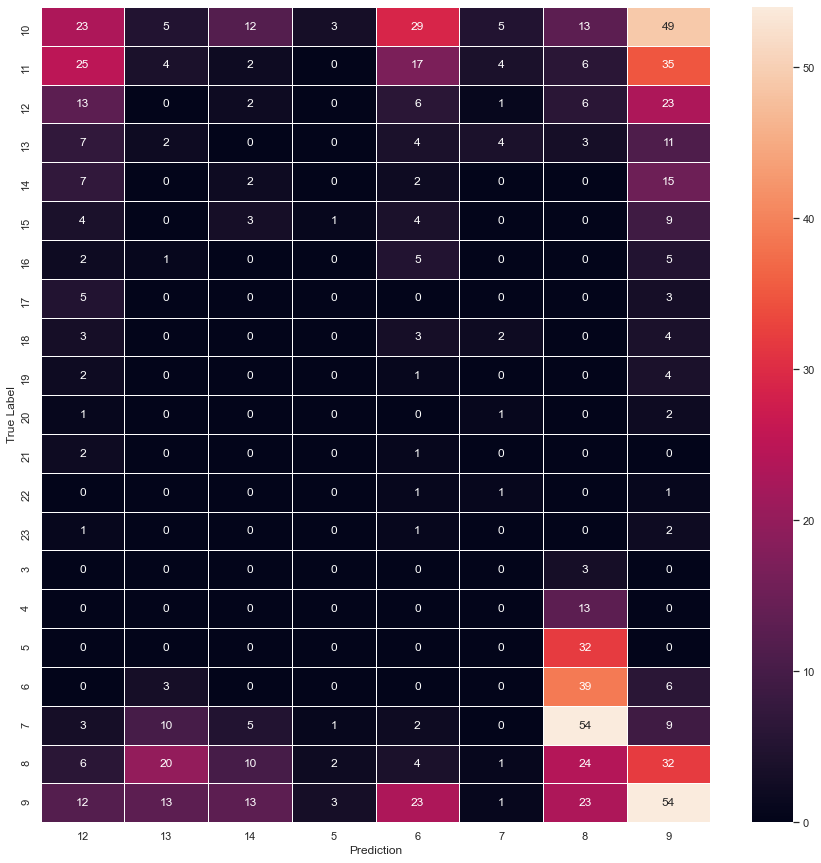

In [194]:
make_heatmap(test_y, prediction)

In [195]:
print(classification_report(levels[test_y], levels[prediction]))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       139
          11       0.00      0.00      0.00        93
          12       0.11      0.25      0.16        51
          13       0.03      0.06      0.04        31
          14       0.04      0.08      0.05        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        32
           6       0.00    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
